### Flight Fare Prediction MH

**Life cycle of Machine learning Project**\
• Understanding the Problem Statement\
• Data Collection\
• Exploratory data analysis\
• Data Cleaning\
• Data Pre-Processing\
• Model Training\
• Choose best model

#### 1) Problem statement.

• This dataset comprises the price prediction of the flights.\
• If user can predict the price of the flights based on input features.\
• Prediction results can be used to give new price suggestions based on flight route or airway companies.

#### 2) Data Collection.
• The Dataset is collected from kaggle collections\
• The data consists of 11 column and 10683 rows.

##### 2.1 Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import os
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

**Download and Import the CSV Data as Pandas DataFrame**

In [2]:
files = os.listdir('.')
if "flight-fare-prediction-mh" not in files:
    od.download("https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh")

dataset = pd.read_excel("flight-fare-prediction-mh/Data_Train.xlsx")

##### Show Top 5 Records

In [3]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


###### Shape of the dataset

In [4]:
dataset.shape

(10683, 11)

###### Summary of the dataset

In [5]:
# Display summary statistics for a dataframe
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


###### Check Datatypes in the dataset

In [6]:
# Check Null and Dtypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### 3. EXPLORING DATA

In [7]:
# define numerical & categorical columns
numeric_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 1 numerical features : ['Price']

We have 10 categorical features : ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


##### Feature Information

• Airline: Airline company names where filghts availability.\
• Date_of_Journey: The day on which the journey begins.\
• Source: The sources place of the starting journey.\
• Destination: The destination place of the ending journey.\
• Route: Routes/ stops of the flights between the source to destination.\
• Dep_Time: The departure time of the flights.\
• Arrival_Time: The arrival time of the flights.\
• Duration: The time taken the journey.\
• Total_Stops: The total stops occured between the source and destination.\
• Additional_Info: The information about the flights.

In [8]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(dataset[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Jet Airways                          36.029205
IndiGo                               19.217448
Air India                            16.399888
Multiple carriers                    11.195357
SpiceJet                              7.657025
Vistara                               4.483759
Air Asia                              2.986053
GoAir                                 1.815969
Multiple carriers Premium economy     0.121689
Jet Airways Business                  0.056164
Vistara Premium economy               0.028082
Trujet                                0.009361
Name: Airline, dtype: float64
---------------------------
18/05/2019    4.717776
6/06/2019     4.708415
21/05/2019    4.652251
9/06/2019     4.633530
12/06/2019    4.614809
9/05/2019     4.530563
21/03/2019    3.959562
15/05/2019    3.791070
27/05/2019    3.575775
27/06/2019    3.323037
24/06/2019    3.285594
1/06/2019     3.201348
3/06/2019     3.117102
15/06/2019    3.070299
24/03/2019    3.023495
6/03/2019     2.883085
27/03/2019

###### Univariate Analysis

• The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

###### Numerical Features

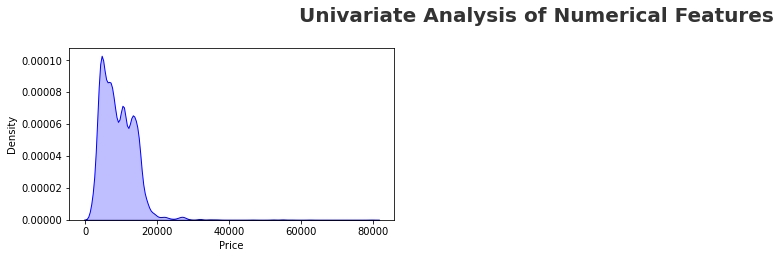

In [9]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=dataset[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

##### Categorical Features

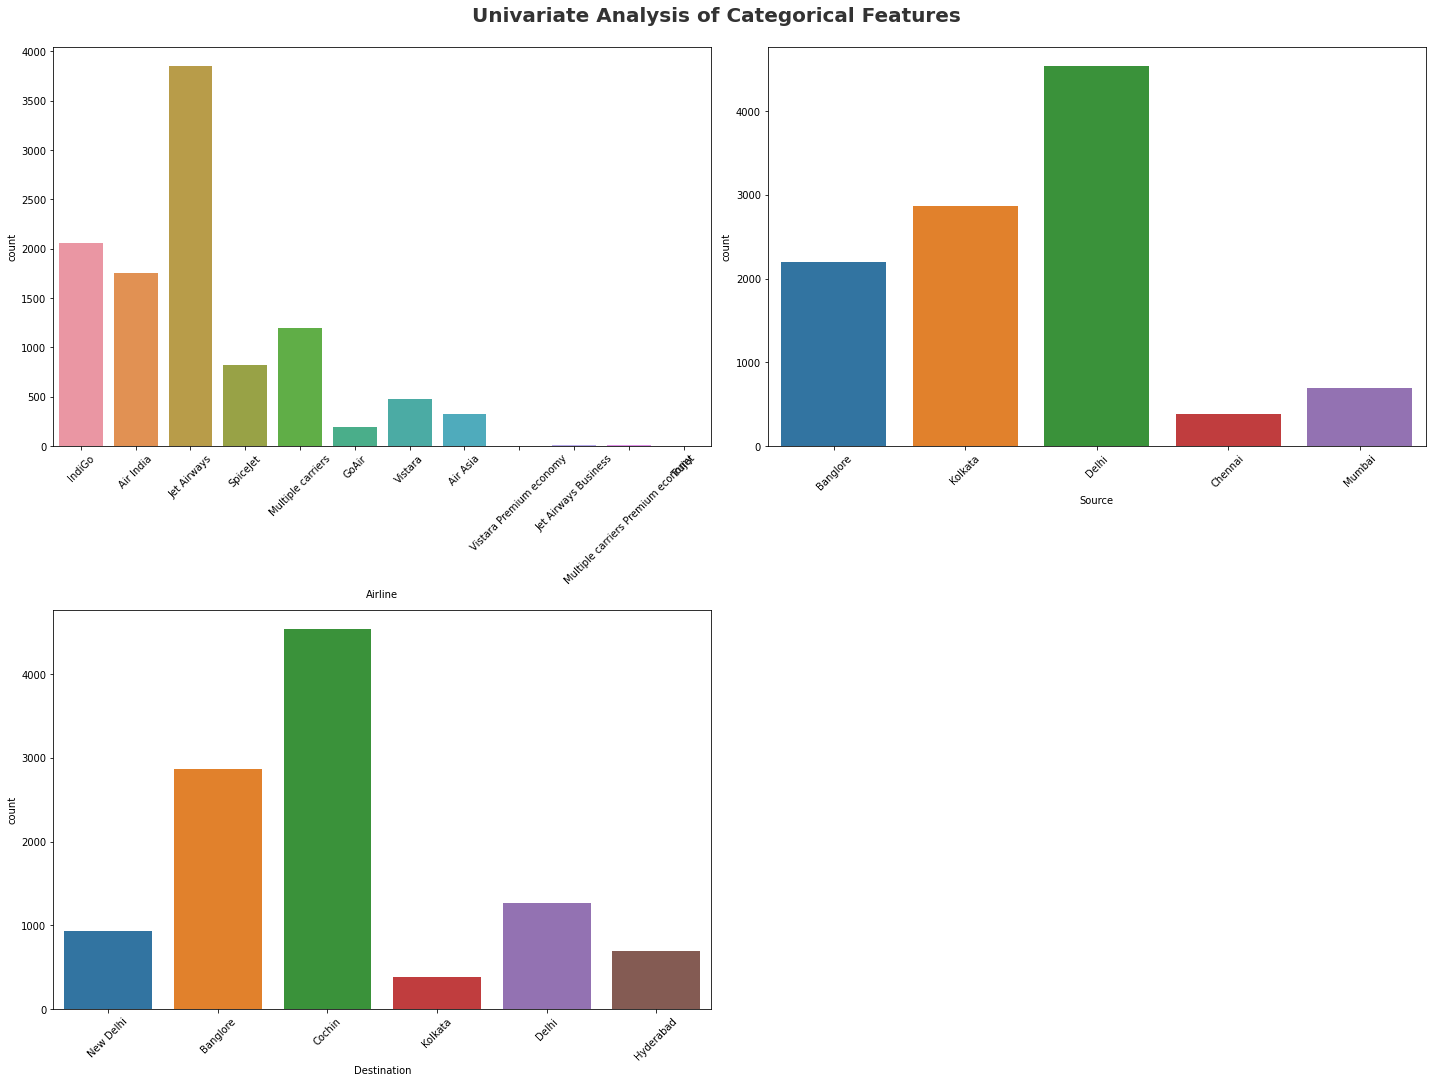

In [10]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['Airline', 'Source', 'Destination']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=dataset[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

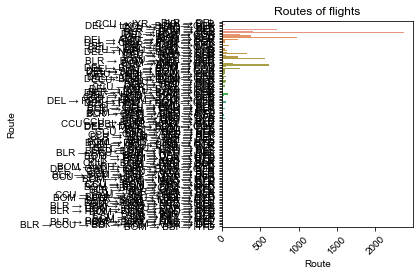

In [11]:
sns.countplot(y=dataset['Route'])
sns.set(rc = {'figure.figsize':(15,35)})
plt.title('Routes of flights')
plt.xlabel('Route')
plt.xticks(rotation=45)
plt.tight_layout()

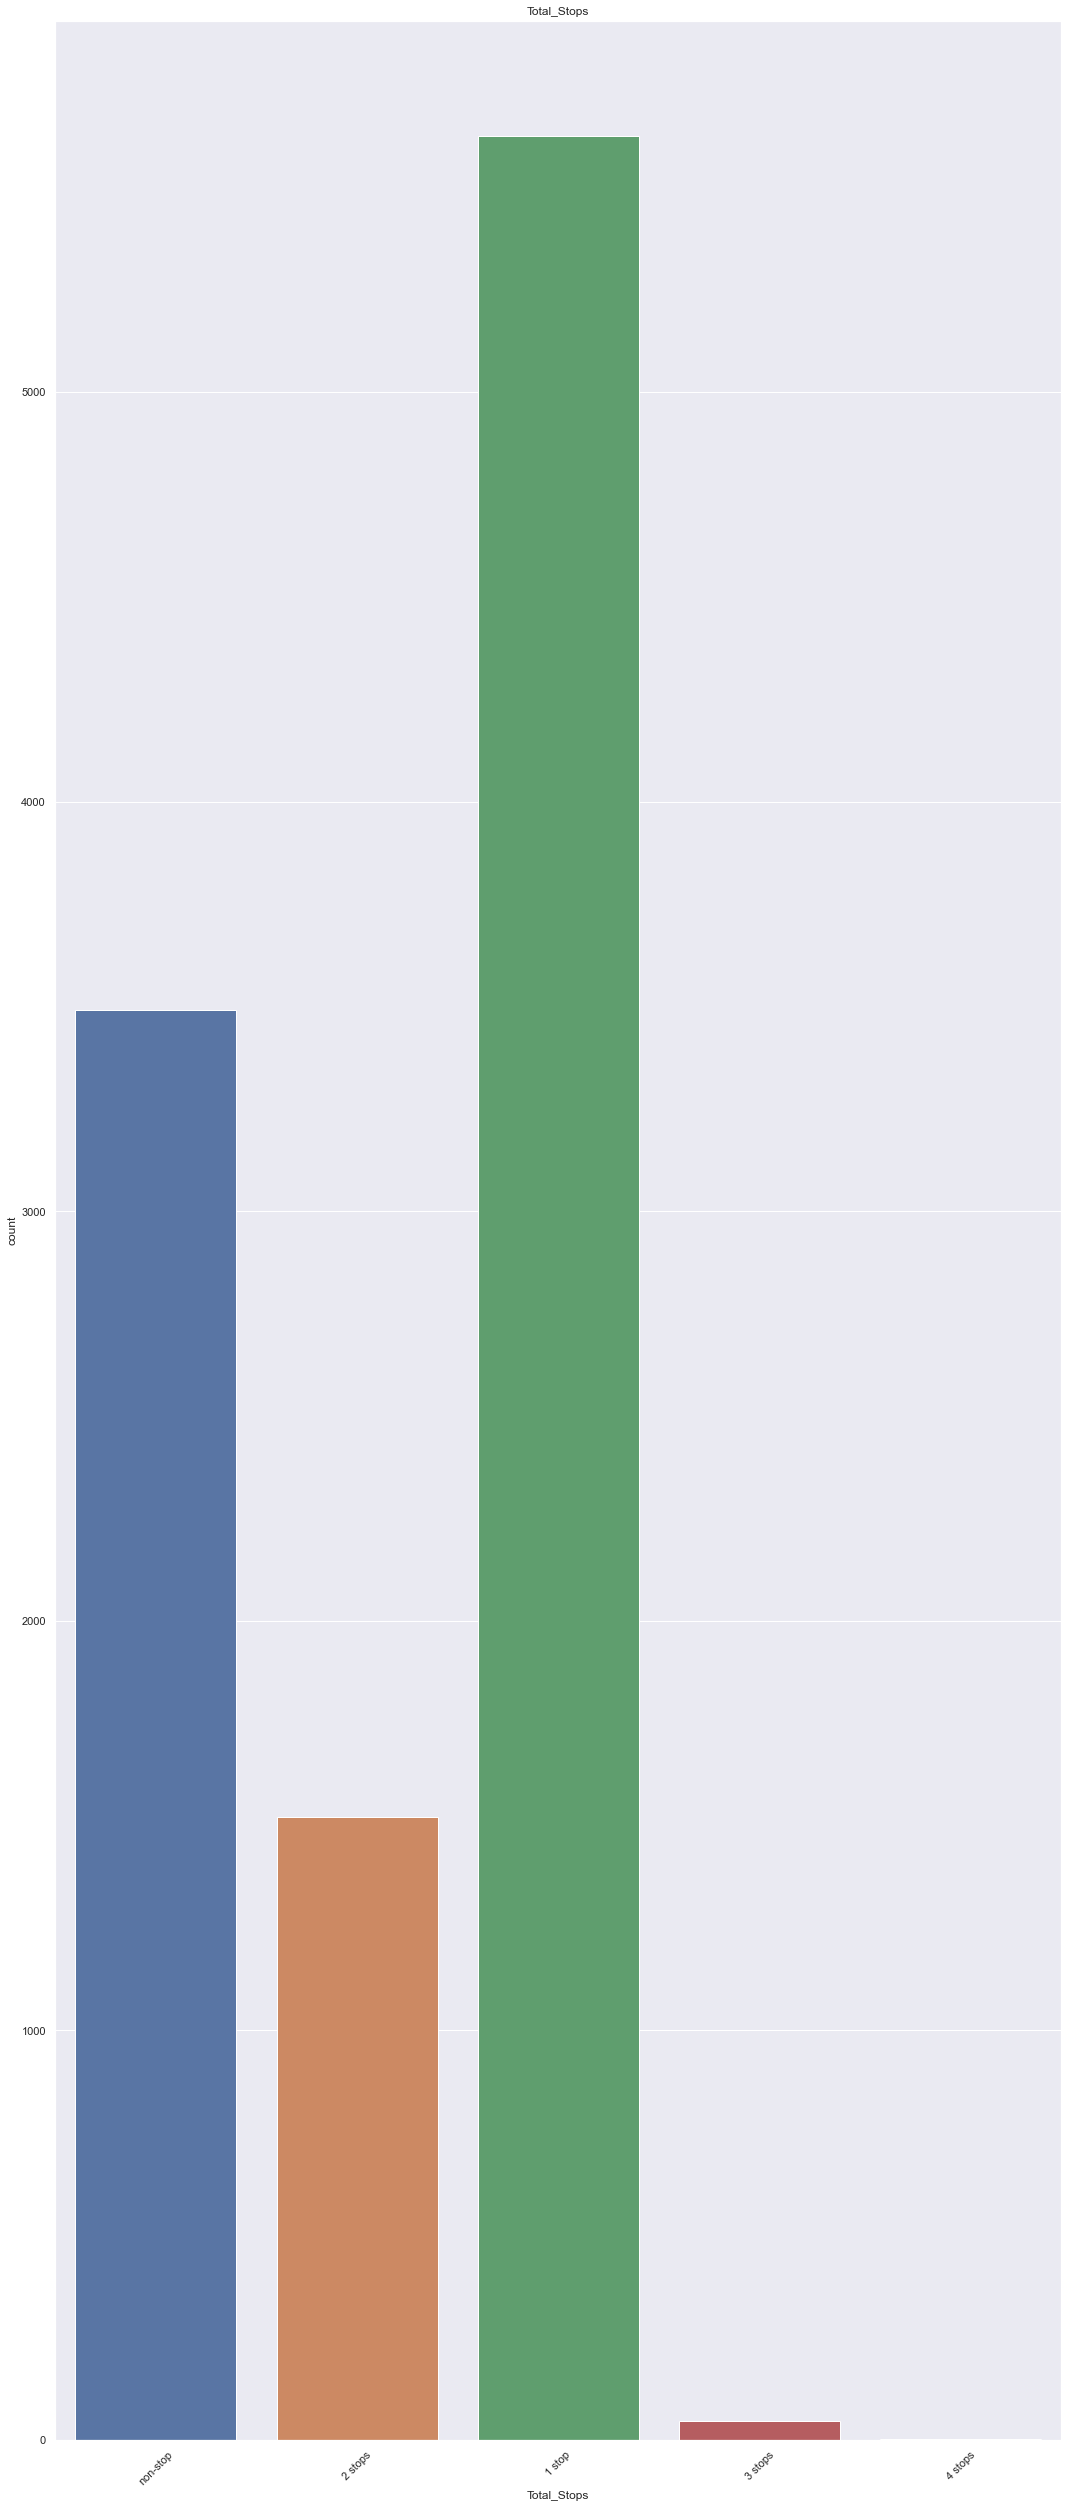

In [12]:
sns.countplot(x=dataset['Total_Stops'])
sns.set(rc = {'figure.figsize':(8, 5)})
plt.title('Total_Stops')
plt.xticks(rotation=45)
plt.tight_layout()

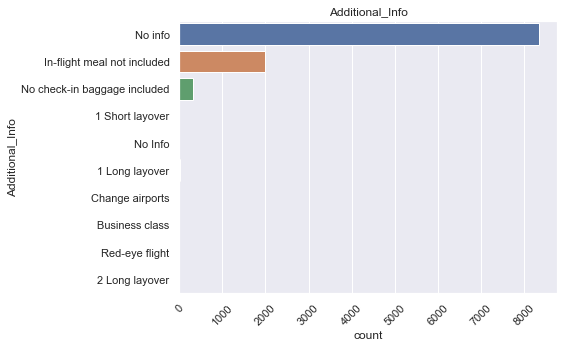

In [13]:
sns.countplot(y=dataset['Additional_Info'])
sns.set(rc = {'figure.figsize':(8, 5)})
plt.title('Additional_Info')
plt.xticks(rotation=45)
plt.tight_layout()

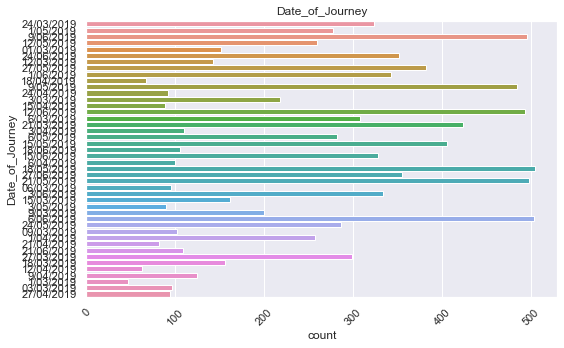

In [14]:
sns.countplot(y=dataset['Date_of_Journey'])
sns.set(rc = {'figure.figsize':(8, 25)})
plt.title('Date_of_Journey')
plt.xticks(rotation=45)
plt.tight_layout()

### Multivariate Analysis
 - Multivariate analysis is the analysis of more than one variable.

 - There is only one numerical column is present in the dataset so the correlation will be always one.

#### Check Multicollinearity for Categorical features
 - A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

 - A chi-square statistic is one way to show a relationship between two categorical variables.

 - Here we test correlation of Categorical columns with Target column i.e Price

In [15]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(dataset['Price'], dataset[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Airline,Reject Null Hypothesis
1,Date_of_Journey,Reject Null Hypothesis
2,Source,Reject Null Hypothesis
3,Destination,Reject Null Hypothesis
4,Route,Reject Null Hypothesis
5,Dep_Time,Reject Null Hypothesis
6,Arrival_Time,Reject Null Hypothesis
7,Duration,Reject Null Hypothesis
8,Total_Stops,Reject Null Hypothesis
9,Additional_Info,Reject Null Hypothesis


### Checking Null Values

In [16]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Scater Plot

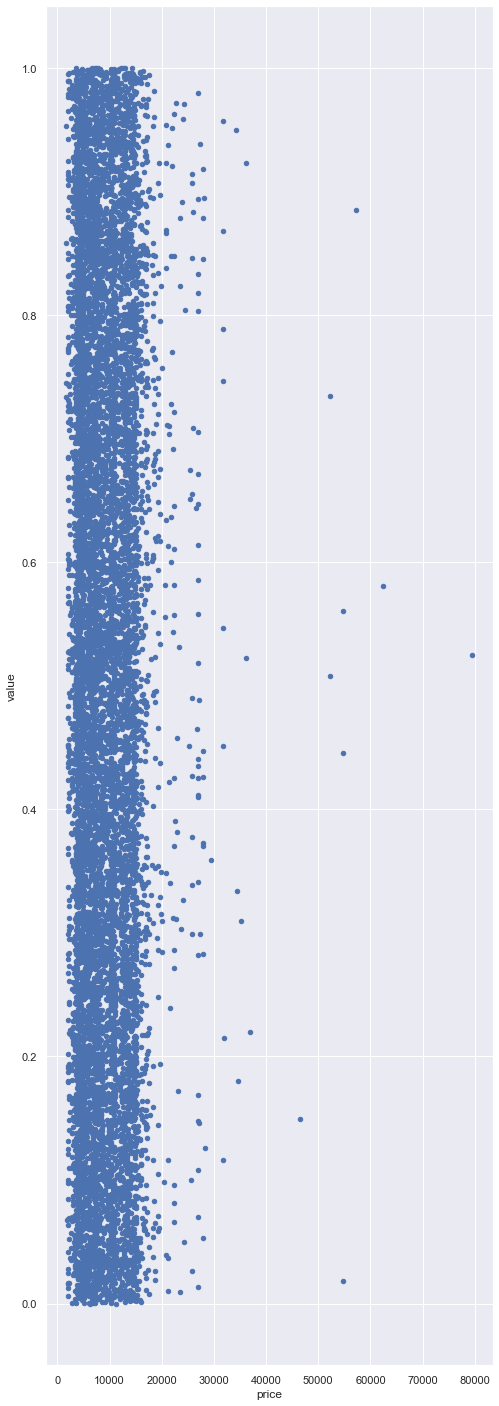

In [17]:
data=dataset['Price']
value = np.random.rand(len(data))

ser =  pd.Series(index = data,data=value)
df =ser.to_frame()

df.reset_index(inplace=True)
df.columns = ['price','value']
df.plot(kind='scatter',x='price',y='value')
sns.set(rc = {'figure.figsize':(18, 10)})
plt.show()

**Report**
 - The most of the flights ticket price falls near to 10000,

### 4. Visualization
##### 4.1 Visualize the Target Feature

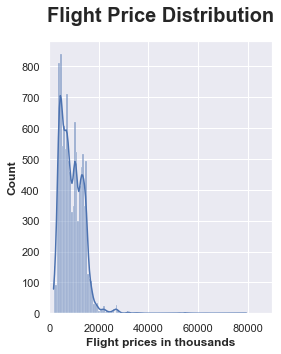

In [18]:
plt.subplots(figsize=(4,5))
sns.histplot(dataset.Price, kde=True)#, bins=5, kde=True, color = 'b')
plt.title("Flight Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Flight prices in thousands", weight="bold", fontsize=12)
plt.xlim(0,90000)
plt.show()

 - From the chart it is clear that the Target Variable Skewed

#### 4.2 Most flights having Airline?

In [19]:
dataset.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

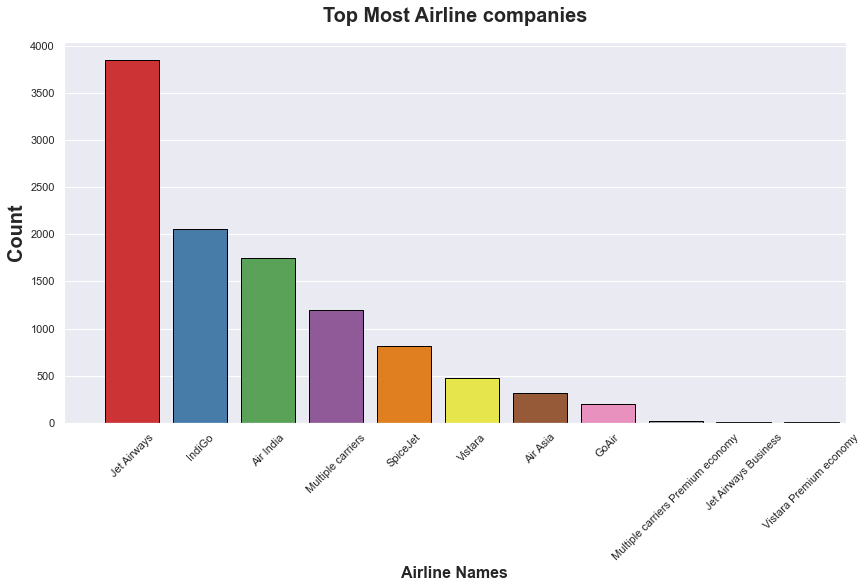

In [20]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Airline", data=dataset,ec = "black",palette="Set1",order = dataset['Airline'].value_counts().index)
plt.title("Top Most Airline companies", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Airline Names", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

**The Jet Airways have a highest flights**

#### Check mean price of Jet Airways

In [21]:
Jet_Airways = dataset[dataset['Airline'] == 'Jet Airways']['Price'].mean()
print(f'The mean price of Jet Airways is {Jet_Airways:.2f} Rupees')

The mean price of Jet Airways is 11643.92 Rupees


**Report**
 - As per the chart you can see the top airline servies companies
 - The jet Airways has more flights than other comapanies
 - The Avarage price of the Jet Airways is 11643.92 rupees

#### Most flights from the city

In [22]:
dataset.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

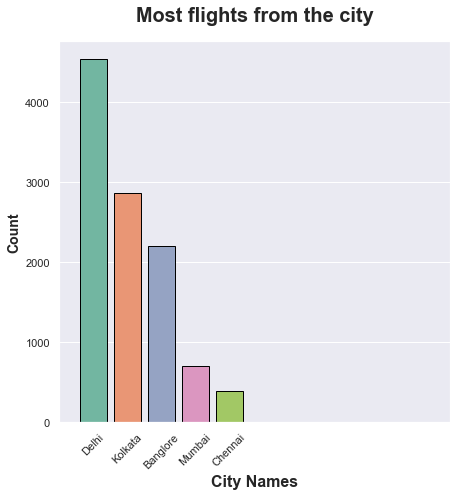

In [23]:
plt.subplots(figsize=(7,7))
sns.countplot(x="Source", data=dataset,ec = "black",palette="Set2",order = dataset.Source.value_counts().index)
plt.title("Most flights from the city", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("City Names", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

**Report:**
 - From the graph and data Delhi have the more flights as source.

#### Destination for the flights

In [24]:
dataset.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

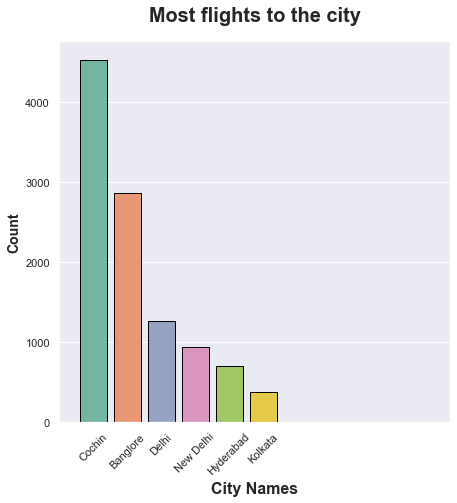

In [25]:
plt.subplots(figsize=(7,7))
sns.countplot(x="Destination", data=dataset,ec = "black",palette="Set2",order = dataset.Destination.value_counts().index)
plt.title("Most flights to the city", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("City Names", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

**Report**
 - Cochin has the most number of times as destination place and Kolkata as the lowest one.

#### Top Routes of the flights

In [26]:
dataset.Route.value_counts()[:10]

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → JAI → BOM → COK     240
Name: Route, dtype: int64

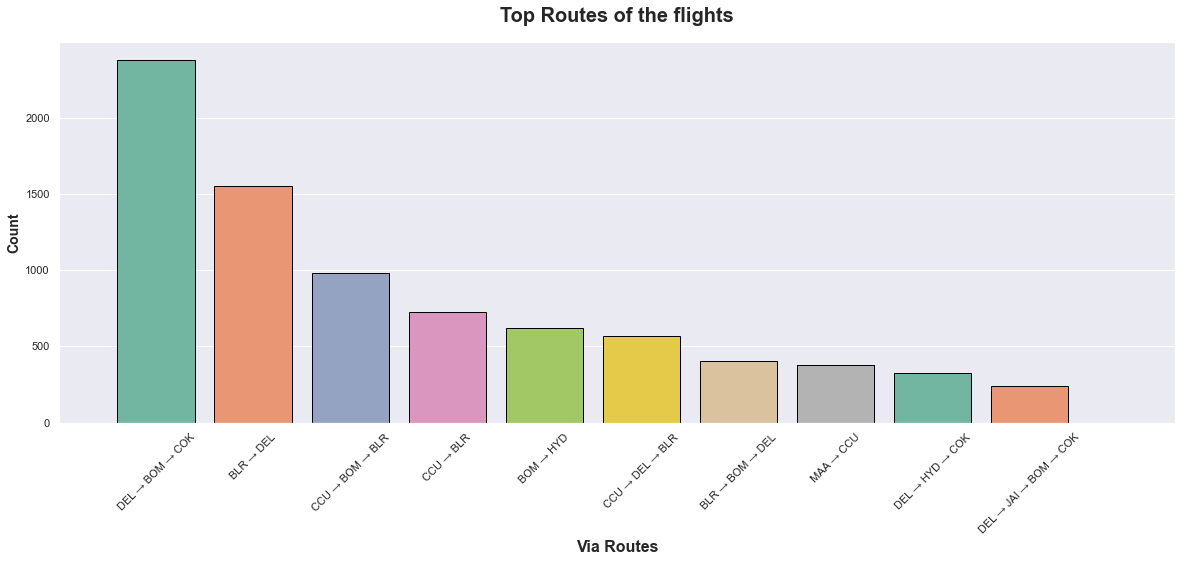

In [27]:
plt.subplots(figsize=(20,7))
sns.countplot(x="Route", data=dataset,ec = "black",palette="Set2",order = dataset.Route.value_counts()[:10].index)
plt.title("Top Routes of the flights", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Via Routes", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

**Report:**
 - Delhi to Bombay and Bombay to Cochin route has the more flights comparing to other routes
 - Ypu can see the top most routes of the flights in the above graph

#### Departure time from the source airport

In [28]:
date_sourcepoint = dataset.groupby(['Date_of_Journey','Source','Destination']).size().reset_index(name='count')

In [29]:
date_sourcepoint.sort_values('count',ascending=False)[:10]

,Date_of_Journey,Source,Destination,count
119,27/05/2019,Delhi,Cochin,281
76,21/03/2019,Delhi,Cochin,275
107,24/06/2019,Delhi,Cochin,260
124,27/06/2019,Delhi,Cochin,257
66,18/05/2019,Delhi,Cochin,247
158,6/06/2019,Delhi,Cochin,246
111,27/03/2019,Delhi,Cochin,243
170,9/05/2019,Delhi,Cochin,242
19,1/06/2019,Delhi,Cochin,242
35,12/06/2019,Delhi,Cochin,241


**Reports:**
 - On 27/05/2019 from Delhi to Cochin 281 flights are the highest on that perticular date

In [30]:
df1 = dataset[['Airline', 'Date_of_Journey']]
df1['Date_of_Journey'] = pd.to_datetime(df1['Date_of_Journey'])

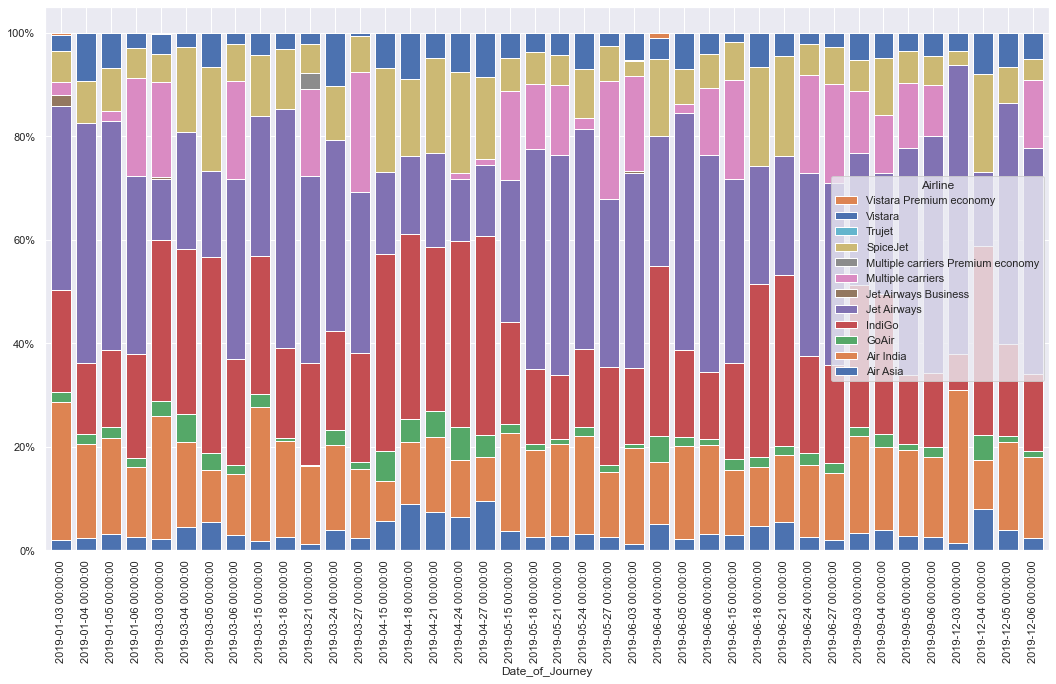

In [31]:
import matplotlib.ticker as mtick

df1.groupby(by=['Date_of_Journey','Airline']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True,legend='reverse',width=0.8)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

**Report:**
 - As you can see the above chart on every date of journey the Jet airways and IndiGo Airlines have more flights than other

#### Duration Vs Route

In [32]:
durationVsroute = dataset[['Route', 'Duration']]
durationVsroute['Duration_min'] = (pd.to_timedelta(durationVsroute['Duration']).dt.seconds // 60)

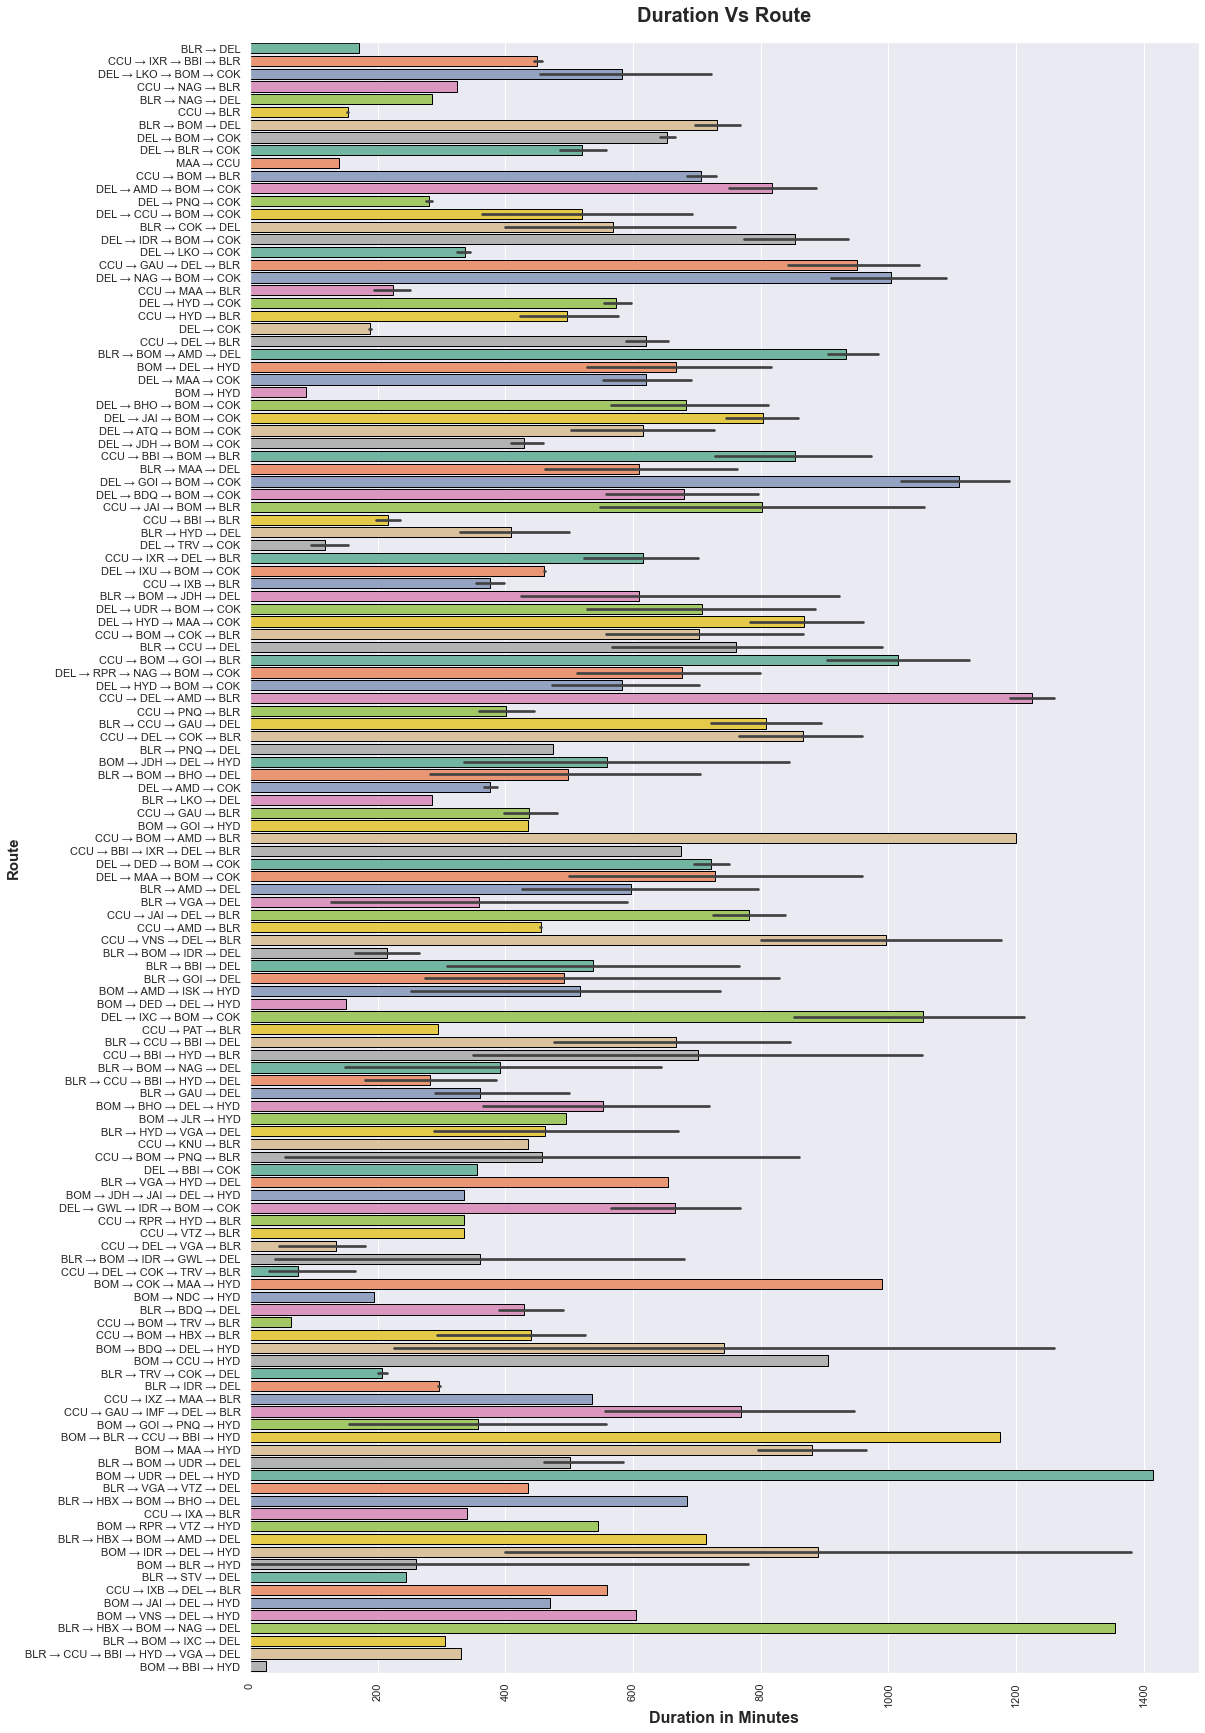

In [33]:
plt.subplots(figsize=(17,30))
sns.barplot(y=durationVsroute.Route, x=durationVsroute.Duration_min,ec = "black",palette="Set2")
plt.title("Duration Vs Route", weight="bold",fontsize=20, pad=20)
plt.ylabel("Route", weight="bold", fontsize=15)
plt.xlabel("Duration in Minutes", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

### Duration vs Price

<AxesSubplot:xlabel='Price', ylabel='Duration'>

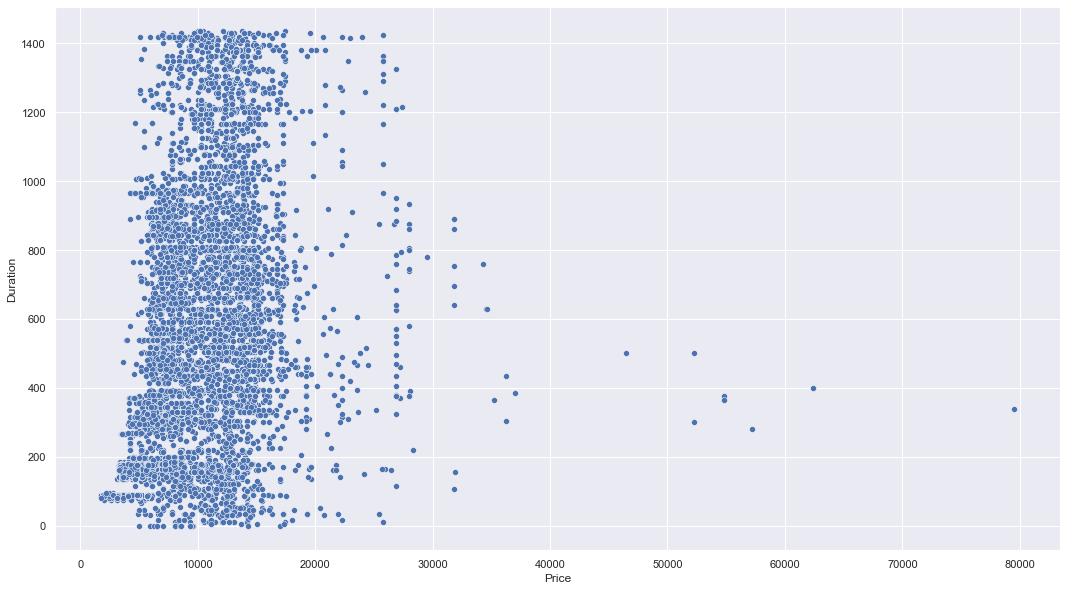

In [34]:
sns.scatterplot(data= dataset, y=(pd.to_timedelta(dataset['Duration']).dt.seconds // 60), x='Price')

In [50]:
corr_data = pd.DataFrame(list(zip((pd.to_timedelta(dataset['Duration']).dt.seconds // 60), dataset['Price'])), columns=['Duration','Price'])

In [53]:
corr_matrix = corr_data.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Duration,Price
Duration,1.000000,0.449471
Price,0.449471,1.000000


**Report:**
 - As the above plot there is not much correlation between the duration time and price

#### total_stops Vs Price

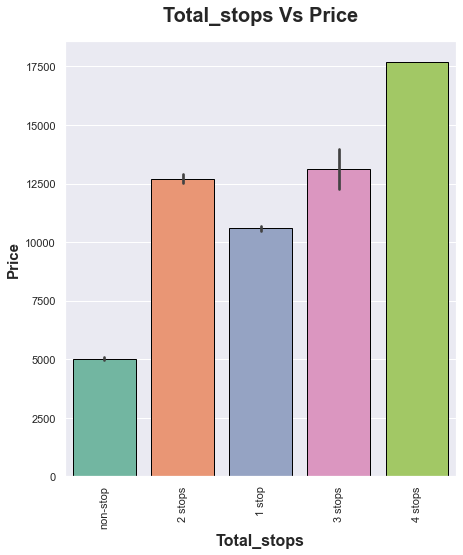

In [35]:
plt.subplots(figsize=(7,8))
sns.barplot(y=dataset.Price, x=dataset.Total_Stops,ec = "black",palette="Set2")
plt.title("Total_stops Vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Price", weight="bold", fontsize=15)
plt.xlabel("Total_stops", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

**Report:**
 - As the number of stops increases the price of the flights also increases

#### Airline Vs Price

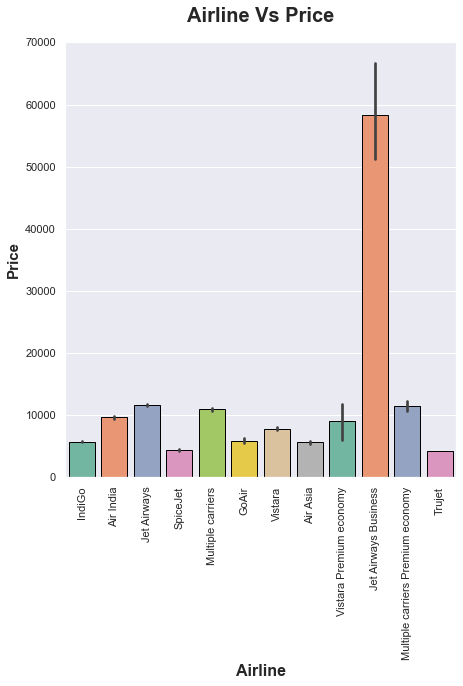

In [36]:
plt.subplots(figsize=(7,8))
sns.barplot(y=dataset.Price, x=dataset.Airline,ec = "black",palette="Set2")
plt.title("Airline Vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Price", weight="bold", fontsize=15)
plt.xlabel("Airline", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

**Report:**
 - The Jet Airways Business flights have the highest price rather than others

In [37]:
dataset.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

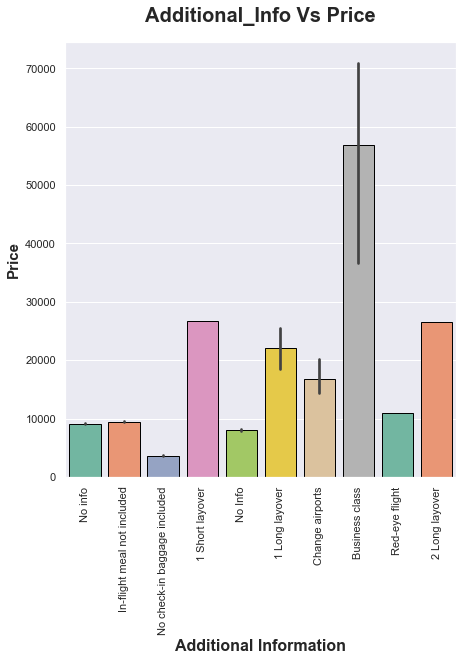

In [38]:
plt.subplots(figsize=(7,8))
sns.barplot(y=dataset.Price, x=dataset.Additional_Info,ec = "black",palette="Set2")
plt.title("Additional_Info Vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Price", weight="bold", fontsize=15)
plt.xlabel("Additional Information", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

**Report:**
 - As oyu know the businees class have more price other than that 2 Long layover and 1 short layover has highest flight price